### Name: Kevin J. Schwint
#### Date: May 9, 2023

# Final Project
## Individual Stock and Stock Portfolio Technical Analysis
### - Web Scraped Data from Financial Website
### - Downloaded Data from Financial Website
### - Downloaded Data from Python yfinance Library

In [1]:
from pathlib import Path
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from textblob.sentiments import NaiveBayesAnalyzer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjs1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Create a WordCloud for Course Keywords

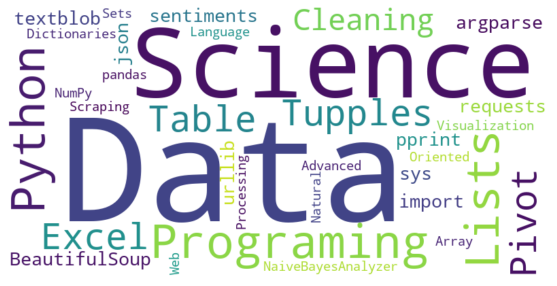

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words
words = ["Data Science Programing", "Python", "Lists", "Tupples", "Excel",
         "Pivot Table", "Data Cleaning", "BeautifulSoup", "argparse", "json",
         "pprint", "requests", "sys", "urllib", "textblob", "sentiments", "import",
         "NaiveBayesAnalyzer", "pandas", "Dictionaries", "Sets", "NumPy",
         "Array Oriented", "Advanced Data Visualization", "Web Scraping",
         "Natural Language Processing"]

# Convert the list of words to a string
text = ' '.join(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the word cloud to a file
plt.savefig('wordcloud.png', dpi=300)  # Adjust the file name and DPI as needed

# Show the word cloud
plt.show()

## Web Scraping with requests and Beautiful Soup

In [4]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Define the URL to scrape
url = 'https://finance.yahoo.com/quote/%5ETNX?p=%5ETNX'
# Send a GET request to the URL
response = requests.get(url)
# Parse the HTML content
soup = bs(response.content, 'html.parser')

In [6]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Treasury Yield 10 Years (^TNX) Charts, Data &amp; News - Yahoo Finance
  </title>
  <meta content="^TNX, Treasury Yield 10 Years, ^TNX stock chart, Treasury Yield 10 Years stock chart, stock chart, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Find the latest information on Treasury Yield 10 Years (^TNX) including data, charts, related news and more from Yahoo Finance" lang="en-US" name="description"

bs4.BeautifulSoup

### Scrape AAPL data from Yahoo Finance web site for specific dates (had some issues)

In [7]:
import requests
from bs4 import BeautifulSoup
import datetime

def scrape_yahoo_finance_history(symbol, start_date, end_date):
    # Format start and end dates as YYYY-MM-DD
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")
    
    # Construct URL with stock symbol and date range
    url = f"https://finance.yahoo.com/quote/{symbol}/history?period1={start_date}&period2={end_date}&interval=1d&filter=history&frequency=1d"
    
    # Send HTTP GET request and parse HTML with BeautifulSoup
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find historical data table and extract rows
    table = soup.find("table", attrs={"data-test": "historical-prices"})
    rows = table.tbody.find_all("tr")
    
    # Extract data from rows
    data = []
    for row in rows:
        cells = row.find_all("td")
        if len(cells) == 7:  # Check that row has data
            date = cells[0].span.text.strip()
            close_price = cells[4].span.text.strip()
            data.append((date, close_price))
    
    return data

# Example usage: scrape data for AAPL for the past year
symbol = "AAPL"
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
data = scrape_yahoo_finance_history(symbol, start_date, end_date)
print(data)

AttributeError: 'NoneType' object has no attribute 'tbody'

### Scrape all Historical data for a Portfolio of Stocks from Yahoo Finance web site (had some issues)

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_yahoo_finance_history(symbol):
    url = f"https://finance.yahoo.com/quote/{symbol}/history"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find_all("table", class_="W(100%) M(0)")[0]  # Updated table class
    rows = table.tbody.find_all("tr")
    data = []
    for row in rows:
        cells = row.find_all("td")
        if len(cells) == 7:
            date = cells[0].span.text.strip()
            open_price = cells[1].span.text.strip()
            high_price = cells[2].span.text.strip()
            low_price = cells[3].span.text.strip()
            close_price = cells[4].span.text.strip()
            adj_close_price = cells[5].span.text.strip()
            volume = cells[6].span.text.strip()
            data.append((date, open_price, high_price, low_price, close_price, adj_close_price, volume))
    return data

def scrape_data(symbols):
    data = {}
    for symbol in symbols:
        data[symbol] = scrape_yahoo_finance_history(symbol)
    return data

# Example usage: scrape data for portfolio
symbols = ["^TNX", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]
data = scrape_data(symbols)

# Convert the data to a pandas DataFrame
df = pd.DataFrame.from_dict(data, orient='index',
                            columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
df.index.name = 'Symbol'

# Print the DataFrame
print(df)

IndexError: list index out of range

### Download all available Data for a Portfolio of Stocks from yfinance Library

In [9]:
import yfinance as yf
import pandas as pd

def scrape_data(symbols):
    data = {}
    for symbol in symbols:
        stock_data = yf.download(symbol, period="max")  # Fetch all available historical data
        data[symbol] = stock_data
        filename = f"{symbol}_data.csv"
        stock_data.to_csv(filename)  # Write the data to a CSV file
        print(f"Data for {symbol} saved to {filename}")
    return data

# Example usage: scrape data for AAPL, IBM, GM, and GE
symbols = ["^TNX", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]
data = scrape_data(symbols)

# Print the DataFrame for each symbol
for symbol, df in data.items():
    print(f"Data for {symbol}:")
    print(df)

[*********************100%***********************]  1 of 1 completed
Data for ^TNX saved to ^TNX_data.csv
[*********************100%***********************]  1 of 1 completed
Data for AAPL saved to AAPL_data.csv
[*********************100%***********************]  1 of 1 completed
Data for BRK-B saved to BRK-B_data.csv
[*********************100%***********************]  1 of 1 completed
Data for DOW saved to DOW_data.csv
[*********************100%***********************]  1 of 1 completed
Data for IBM saved to IBM_data.csv
[*********************100%***********************]  1 of 1 completed
Data for GE saved to GE_data.csv
[*********************100%***********************]  1 of 1 completed
Data for MO saved to MO_data.csv
[*********************100%***********************]  1 of 1 completed
Data for GLD saved to GLD_data.csv
[*********************100%***********************]  1 of 1 completed
Data for SLV saved to SLV_data.csv
Data for ^TNX:
             Open   High    Low  Close  Adj C

### Read Stock Data from a csv. file

In [10]:
symbols = ["^INDS", "^RUT", "^TNX", "EURUSD=X", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]

dfs = {}

for symbol in symbols:
    dfs[f"{symbol}_df"] = read_datafile(symbol)
    print(symbol)
    print()
    print(dfs[f"{symbol}_df"])
    print()
    df

NameError: name 'read_datafile' is not defined

### Read Stock Data from a csv. file using function

In [11]:
import pandas as pd

def read_datafile(symbol):
    datafile = f"{symbol}.csv"  # Use the input symbol as the filename
    df = pd.read_csv(datafile)
    return df  # Return the DataFrame

# Example usage: scrape data for AAPL for the past year
symbol = "AAPL"
data_AAPL = read_datafile(symbol)
print(symbol)
print(data_AAPL)  # Print the DataFrame

# Save the DataFrame to a CSV file
data_AAPL.to_csv("data_AAPL.csv", index=False)  
# Set index=False to exclude the index column

# Save the DataFrame to an Excel file (optional)
data_AAPL.to_excel("data_AAPL.xlsx", index=False)  
# Set index=False to exclude the index column


AAPL
             Date        Open        High         Low       Close   Adj Close  \
0      12/12/1980    0.128348    0.128906    0.128348    0.128348    0.099722   
1      12/15/1980    0.122210    0.122210    0.121652    0.121652    0.094519   
2      12/16/1980    0.113281    0.113281    0.112723    0.112723    0.087582   
3      12/17/1980    0.115513    0.116071    0.115513    0.115513    0.089749   
4      12/18/1980    0.118862    0.119420    0.118862    0.118862    0.092351   
...           ...         ...         ...         ...         ...         ...   
10680   4/25/2023  165.190002  166.309998  163.729996  163.770004  163.770004   
10681   4/26/2023  163.059998  165.279999  162.800003  163.759995  163.759995   
10682   4/27/2023  165.190002  168.559998  165.190002  168.410004  168.410004   
10683   4/28/2023  168.490005  169.850006  167.880005  169.679993  169.679993   
10684    5/1/2023  169.279999  170.449997  168.639999  169.589996  169.589996   

          Volume  
0  

In [12]:
import pandas as pd

def read_datafile(filepath):
    df = pd.read_csv(filepath)
    return df

# Example usage: read data for multiple symbols
symbols = ["AAPL", "BRK-B", "DOW", "GE", "GOLD", ]

for symbol in symbols:
    filepath = f"{symbol}.csv"
    data = read_datafile(filepath)
    print(symbol)
    print(data)

AAPL
             Date        Open        High         Low       Close   Adj Close  \
0      12/12/1980    0.128348    0.128906    0.128348    0.128348    0.099722   
1      12/15/1980    0.122210    0.122210    0.121652    0.121652    0.094519   
2      12/16/1980    0.113281    0.113281    0.112723    0.112723    0.087582   
3      12/17/1980    0.115513    0.116071    0.115513    0.115513    0.089749   
4      12/18/1980    0.118862    0.119420    0.118862    0.118862    0.092351   
...           ...         ...         ...         ...         ...         ...   
10680   4/25/2023  165.190002  166.309998  163.729996  163.770004  163.770004   
10681   4/26/2023  163.059998  165.279999  162.800003  163.759995  163.759995   
10682   4/27/2023  165.190002  168.559998  165.190002  168.410004  168.410004   
10683   4/28/2023  168.490005  169.850006  167.880005  169.679993  169.679993   
10684    5/1/2023  169.279999  170.449997  168.639999  169.589996  169.589996   

          Volume  
0  

FileNotFoundError: [Errno 2] No such file or directory: 'GOLD.csv'

### Read in Historical Data from .csv file and write an .xlxs file

^INDS

            Date         Open         High          Low        Close  \
0     10/25/1990   365.329987   366.260010   361.890015   363.450012   
1     10/26/1990   359.910004   361.940002   357.290009   357.480011   
2     10/29/1990   358.100006   358.739990   352.510010   353.279999   
3     10/30/1990   350.839996   352.920013   349.029999   352.630005   
4     10/31/1990   353.769989   354.660004   351.630005   352.630005   
...          ...          ...          ...          ...          ...   
8185   4/25/2023  8140.319824  8157.149902  8059.669922  8059.709961   
8186   4/26/2023  7990.330078  8080.569824  7977.500000  7990.330078   
8187   4/27/2023  8055.390137  8189.919922  8040.339844  8185.640137   
8188   4/28/2023  8163.060059  8209.959961  8096.000000  8194.709961   
8189    5/1/2023  8172.319824  8182.759766  8110.310059  8123.569824   

        Adj Close  Volume  
0      363.450012       0  
1      357.480011       0  
2      353.279999       0  
3      352.63000

ValueError: Format 'xlxs' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

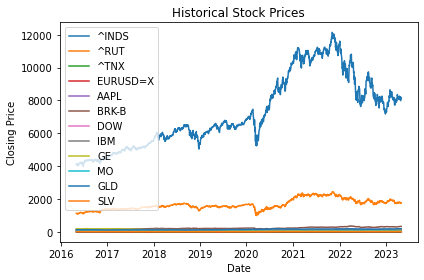

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def read_datafile(symbol):
    datafile = symbol + ".csv"
    df = pd.read_csv(datafile)
    return df

# Example usage: read data for AAPL, IBM, GM, GE into separate dataframes
#dfs = []
#for symbol in symbols:
#    df = read_datafile(symbol)
#    dfs.append(df)


# Read in data from CSV files
inds_data = pd.read_csv("^inds.csv", index_col="Date", parse_dates=True)
gld_data = pd.read_csv("^rut.csv", index_col="Date", parse_dates=True)
tnx_data = pd.read_csv("^tnx.csv", index_col="Date", parse_dates=True)
eurusd_data = pd.read_csv("eurusd=x.csv", index_col="Date", parse_dates=True)
aapl_data = pd.read_csv("aapl.csv", index_col="Date", parse_dates=True)
brk_b_data = pd.read_csv("brk-b.csv", index_col="Date", parse_dates=True)
dow_data = pd.read_csv("dow.csv", index_col="Date", parse_dates=True)
ibm_data = pd.read_csv("ibm.csv", index_col="Date", parse_dates=True)
ge_data = pd.read_csv("ge.csv", index_col="Date", parse_dates=True)
mo_data = pd.read_csv("mo.csv", index_col="Date", parse_dates=True)
gld_data = pd.read_csv("gld.csv", index_col="Date", parse_dates=True)
slv_data = pd.read_csv("slv.csv", index_col="Date", parse_dates=True)

symbols = ["^INDS", "^RUT", "^TNX", "EURUSD=X", "AAPL", "BRK-B",
           "DOW", "IBM", "GE", "MO", "GLD", "SLV"]

dfs = {}

for symbol in symbols:
    dfs[symbol] = read_datafile(symbol)
    print(symbol)
    print()
    print(dfs[symbol])
    print()
    
    # Plot each symbol's historical data for the past 5 years
for symbol, df in dfs.items():
    df['Date'] = pd.to_datetime(df['Date'])  # convert Date column to datetime format
    df = df.set_index('Date')
    df = df.loc['2016-05-04':]  # select data from 5 years ago until today
    plt.plot(df['Close'], label=symbol)

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Prices')

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig(f"historical_data.xlxs")
    
# Save the plot to a JPEG file
plt.savefig(f"historical_data", format='xlxs')

plt.show()


### Plot AAPL Closing Price and Volume for the last 3 Years

[*********************100%***********************]  1 of 1 completed
Results saved to closing_price_volume.csv


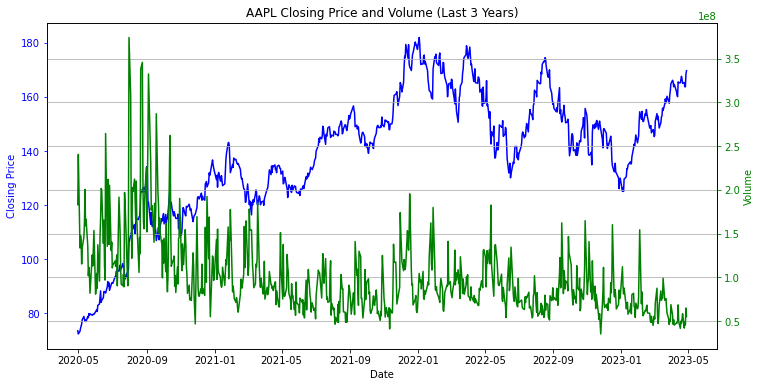

In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set the ticker symbol and start/end dates
ticker = "AAPL"
start_date = "2020-04-30"
end_date = "2023-04-30"

# Fetch the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the closing price and volume data
closing_price = data["Close"]
volume = data["Volume"]

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the closing price on the left y-axis
ax1.plot(closing_price, color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price", color="blue")
ax1.tick_params("y", colors="blue")

# Create a twin y-axis for volume
ax2 = ax1.twinx()

# Plot the volume on the right y-axis
ax2.plot(volume, color="green")
ax2.set_ylabel("Volume", color="green")
ax2.tick_params("y", colors="green")

# Set the title
plt.title("AAPL Closing Price and Volume (Last 3 Years)")
plt.grid(True)

# Save the plot to a PNG file
plt.savefig("closing_price_volume.png")

# Save the plot to a JPEG file
plt.savefig("closing_price_volume.jpeg", format='jpeg')

# Write the results to a CSV file
output_filename = "closing_price_volume.csv"
result_df = pd.concat([closing_price, volume], axis=1)
result_df.columns = ["Closing Price", "Volume"]
result_df.to_csv(output_filename, index=True)
print(f"Results saved to {output_filename}")

# Show the plot
plt.show()

### Compare Historical Data for Two Stocks against Interest Rates over a Specific Range of Dates

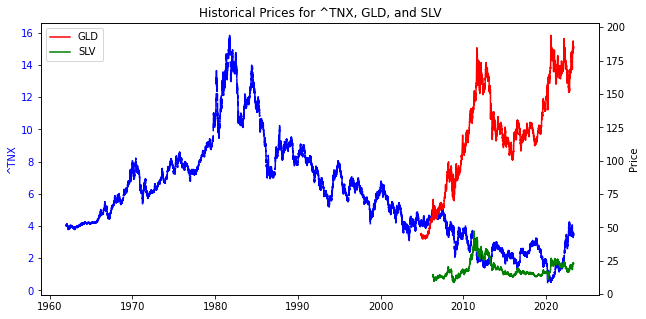

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in data from CSV files
tnx_data = pd.read_csv("^tnx.csv", index_col="Date", parse_dates=True)
gld_data = pd.read_csv("gld.csv", index_col="Date", parse_dates=True)
slv_data = pd.read_csv("slv.csv", index_col="Date", parse_dates=True)

# Create figure and two axes
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Plot ^TNX on the first y-axis
ax1.plot(tnx_data["Close"], color="blue")
ax1.set_ylabel("^TNX", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot GLD and SLV on the second y-axis
ax2.plot(gld_data["Close"], color="red", label="GLD")
ax2.plot(slv_data["Close"], color="green", label="SLV")
ax2.set_ylabel("Price", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Add legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles1 + handles2, labels1 + labels2, loc="upper left")

# Set title and x-axis label
plt.title("Historical Prices for ^TNX, GLD, and SLV")
plt.xlabel("Date")

# Save the plot to a PNG file
plt.savefig("tnx_against_gld_slv.png")

# Save the plot to a JPEG file
plt.savefig("tnx_against_gld_slv.jpeg", format='jpeg')

# Show the plot
plt.show()

### Compare Historical Data for Two Stocks against Interest Rates over a Specific Range of Dates

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


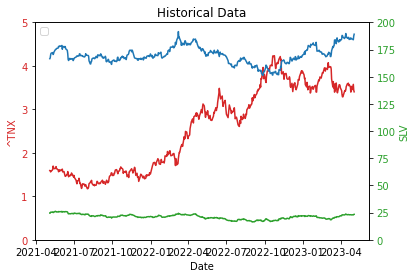

In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set the start and end dates
start_date = "2021-05-04"
end_date = "2023-05-04"

# Define the symbols to scrape
symbols = ["^TNX", "GLD", "SLV"]

# Scrape historical data for each symbol and store it in a dataframe
dfs = []
for symbol in symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    df = df.dropna() # drop any rows with missing values
    dfs.append(df)

# Create a figure with two y-axes
fig, ax1 = plt.subplots()

# Set the title and x-axis label
plt.title("Historical Data")
plt.xlabel("Date")

# Plot ^TNX on the left y-axis
color = 'tab:red'
ax1.set_ylabel('^TNX', color=color)
ax1.plot(dfs[0].index, dfs[0]['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot GLD and SLV on the right y-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GLD', color=color)
ax2.plot(dfs[1].index, dfs[1]['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.set_ylabel('SLV', color=color)
ax2.plot(dfs[2].index, dfs[2]['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the y-axis limits
ax1.set_ylim([0, 5])
ax2.set_ylim([0, 200])

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Show the plot
plt.show()

### Interest Rates Compared to Precious Metals

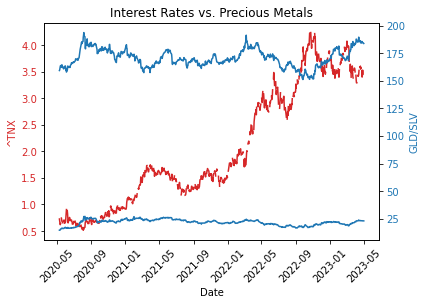

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# define function to read in datafile
def read_datafile(symbol):
    datafile = symbol + ".csv"
    df = pd.read_csv(datafile, index_col="Date", parse_dates=True)
    return df

# define symbols
symbols = ["^TNX", "GLD", "SLV"]

# create empty dictionary to hold dataframes
dfs = {}

# read datafiles and store dataframes in dictionary
for symbol in symbols:
    dfs[symbol] = read_datafile(symbol)

# extract data for last 3 years
start_date = pd.to_datetime('today') - pd.DateOffset(years=3)
end_date = pd.to_datetime('today')
for symbol in symbols:
    dfs[symbol] = dfs[symbol].loc[start_date:end_date]

# plot data on left and right y-axes
fig, ax1 = plt.subplots()

# plot ^TNX on left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('^TNX', color=color)
ax1.plot(dfs['^TNX'].index, dfs['^TNX']['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

# create another y-axis on the right for GLD and SLV
ax2 = ax1.twinx()

# plot GLD and SLV on right y-axis
color = 'tab:blue'
ax2.set_ylabel('GLD/SLV', color=color)
ax2.plot(dfs['GLD'].index, dfs['GLD']['Close'], color=color)
ax2.plot(dfs['SLV'].index, dfs['SLV']['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# set plot title
plt.title('Interest Rates vs. Precious Metals')

# show plot
plt.show()

### Binary Stock Charts - Each Stock against 10-year Treasury

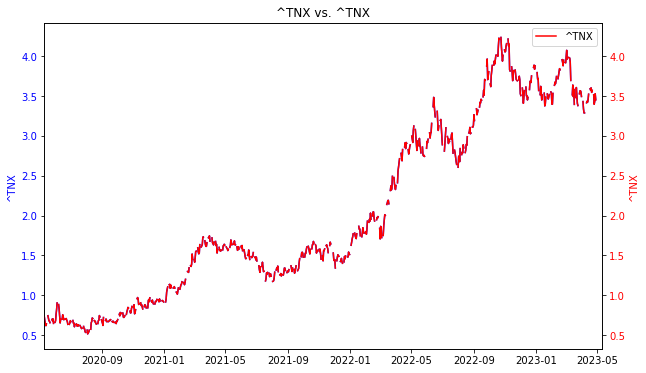

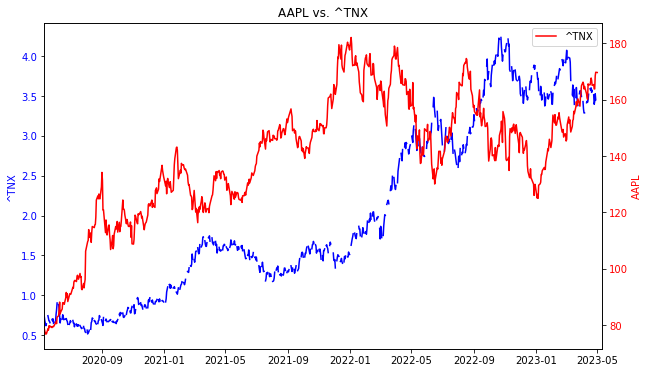

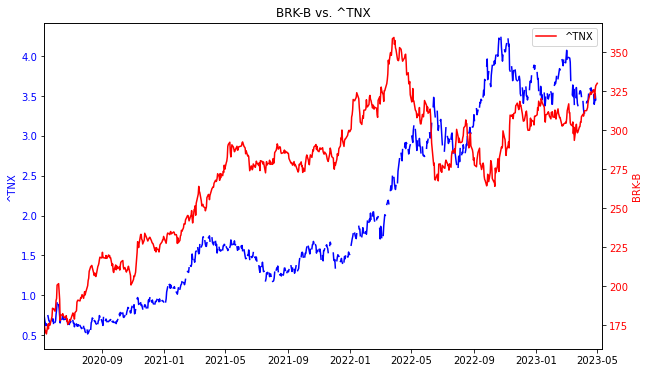

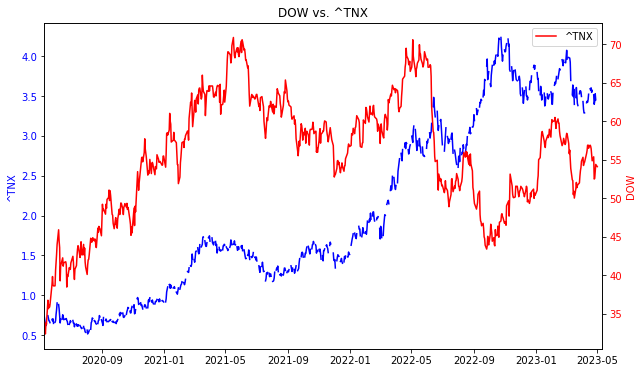

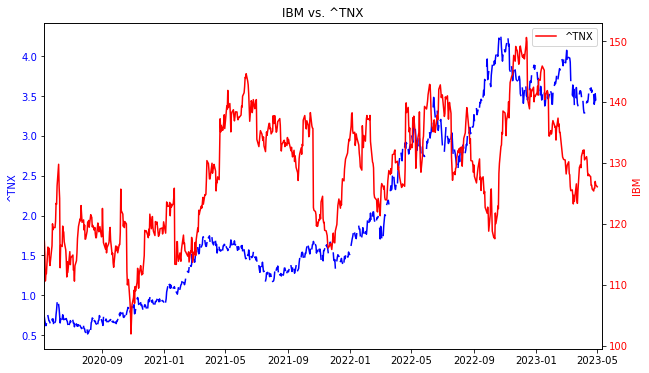

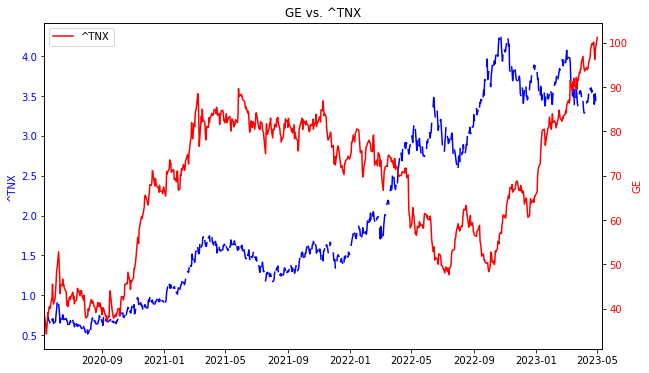

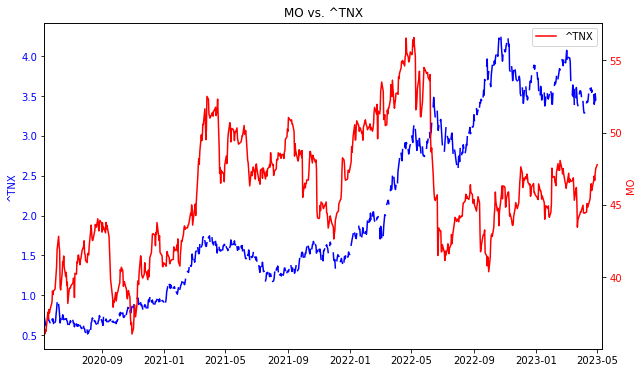

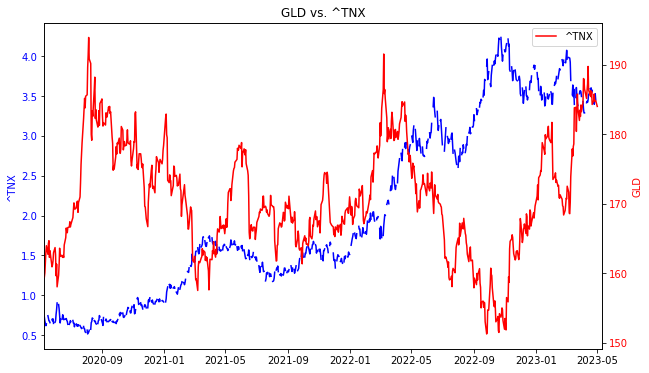

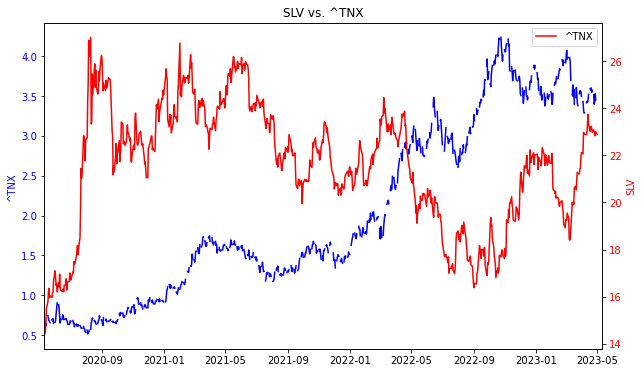

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# List of symbols to plot
symbols = ["^TNX", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]

# Read data for each symbol and store in a dictionary
dfs = {}
for symbol in symbols:
    dfs[symbol] = pd.read_csv(f"{symbol}.csv", index_col="Date", parse_dates=True)

# Set start and end dates for plotting
start_date = pd.to_datetime('today') - pd.DateOffset(years=3)
end_date = pd.to_datetime('today')

# Create separate plots for each symbol
for symbol in symbols:
    # Create a new figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot ^TNX on the left y-axis
    ax1.plot(dfs["^TNX"].loc[start_date:end_date].index, dfs["^TNX"].loc[start_date:end_date]["Close"], color="blue")
    ax1.set_ylabel("^TNX", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    
    # Create a twin axis on the right side
    ax2 = ax1.twinx()
    
    # Plot the corresponding stock on the right y-axis
    ax2.plot(dfs[symbol].loc[start_date:end_date].index, dfs[symbol].loc[start_date:end_date]["Close"], color="red")
    ax2.set_ylabel(symbol, color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    
    # Set x-axis limits
    ax1.set_xlim([start_date, end_date])
    
    # Add a title and legend
    plt.title(f"{symbol} vs. ^TNX")
    plt.legend(["^TNX", symbol])
    
    # Show the plot
    plt.show()

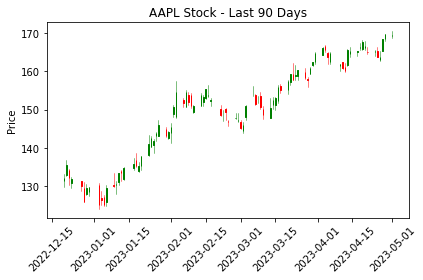

In [19]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates

# Read the data from the CSV file
datafile = 'AAPL.csv'
df = pd.read_csv(datafile, parse_dates=True, index_col=0)

# Slice the data for the last 90 days
last_90_days = df.tail(90).copy()

# Create a new figure and axis for the plot
fig, ax = plt.subplots()

# Convert the date index to a numerical format compatible with candlestick_ohlc
last_90_days['Date'] = last_90_days.index.map(mpdates.date2num)

# Iterate over the data and plot each candlestick
for i, row in last_90_days.iterrows():
    open_price = row['Open']
    high = row['High']
    low = row['Low']
    close = row['Close']
    color = 'green' if close >= open_price else 'red'
    candlestick_ohlc(ax, [[row['Date'], open_price, high, low, close]], colorup='green', colordown='red')

# Set the x-axis tick labels
ax.xaxis.set_major_formatter(mpdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mpdates.AutoDateLocator())

# Set the plot title and labels
ax.set_title('AAPL Stock - Last 90 Days')
ax.set_ylabel('Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Candlestick Charts of Stock Portfolio

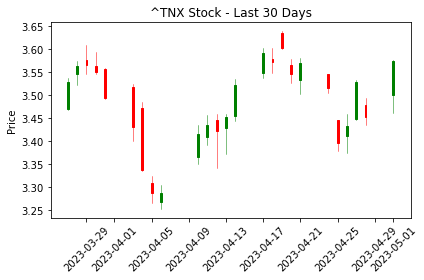

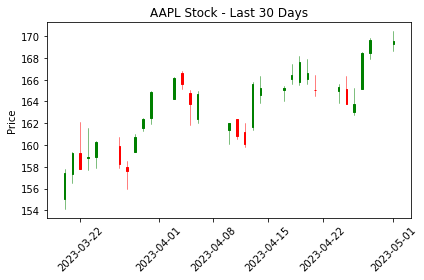

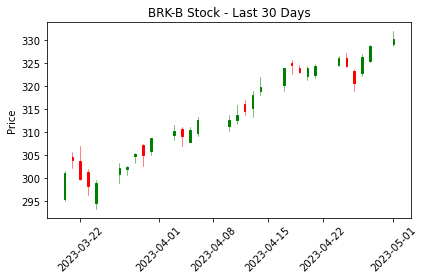

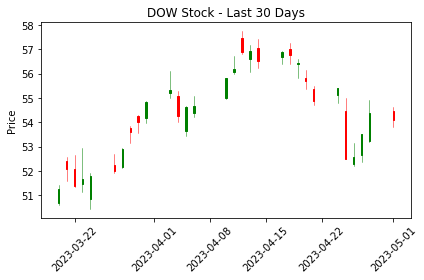

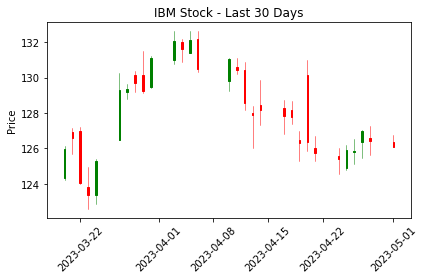

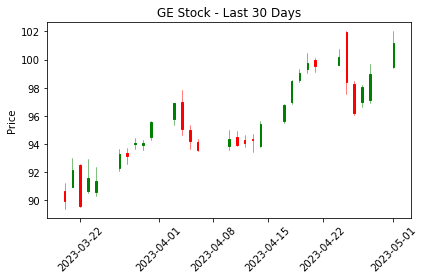

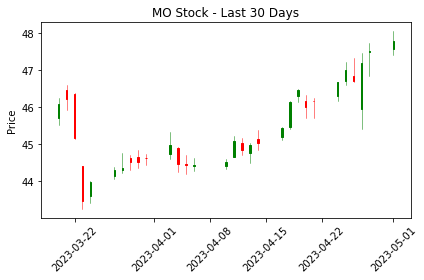

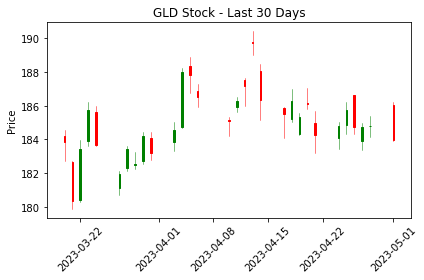

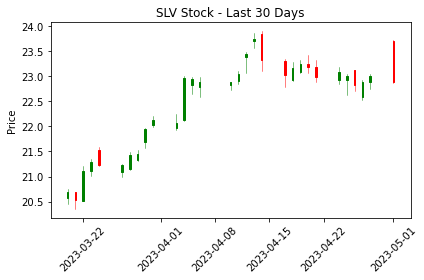

In [20]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates

# List of symbols to plot
symbols = ["^TNX", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]

# Iterate over each symbol
for symbol in symbols:
    # Read the data from the CSV file
    datafile = f"{symbol}.csv"
    df = pd.read_csv(datafile, parse_dates=True, index_col=0)

    # Slice the data for the last 30 days
    last_30_days = df.tail(30).copy()

    # Create a new figure and axis for the plot
    fig, ax = plt.subplots()

    # Convert the date index to a numerical format compatible with candlestick_ohlc
    last_30_days['Date'] = last_30_days.index.map(mpdates.date2num)

    # Iterate over the data and plot each candlestick
    for i, row in last_30_days.iterrows():
        open_price = row['Open']
        high = row['High']
        low = row['Low']
        close = row['Close']
        color = 'green' if close >= open_price else 'red'
        candlestick_ohlc(ax, [[row['Date'], open_price, high, low, close]], colorup='green', colordown='red')

    # Set the x-axis tick labels
    ax.xaxis.set_major_formatter(mpdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mpdates.AutoDateLocator())

    # Set the plot title and labels
    ax.set_title(f"{symbol} Stock - Last 30 Days")
    ax.set_ylabel('Price')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Save the plot to a PNG file
    plt.tight_layout()
    plt.savefig(f"{symbol}_candlestick.png")
    
    # Save the plot to a JPEG file
    plt.tight_layout()
    plt.savefig(f"{symbol}_candlestick.jpeg", format='jpeg')
    
    # Show the plot
    plt.show()
    
    # Close the plot
    plt.close()

### Stock Portfolio Corelation Matrix

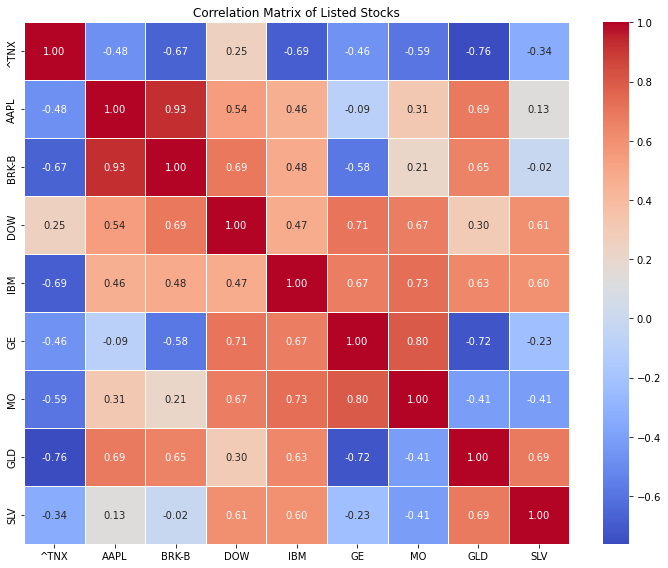

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of symbols
symbols = ["^TNX", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]

# Fetch the stock data and create a DataFrame
dfs = {}
for symbol in symbols:
    dfs[symbol] = pd.read_csv(f"{symbol}.csv", parse_dates=True, index_col=0)

# Combine the closing prices into a single DataFrame
df_close = pd.concat([df['Close'] for df in dfs.values()], axis=1)
df_close.columns = symbols

# Compute the correlation matrix
corr_matrix = df_close.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Listed Stocks")

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig(f"corr_matrix.png")
    
# Save the plot to a JPEG file
plt.savefig(f"corr_matrix.jpeg", format='jpeg')
    
plt.show()

### Single Industry (Airlines) Stock Portfolio Corelation Matrix

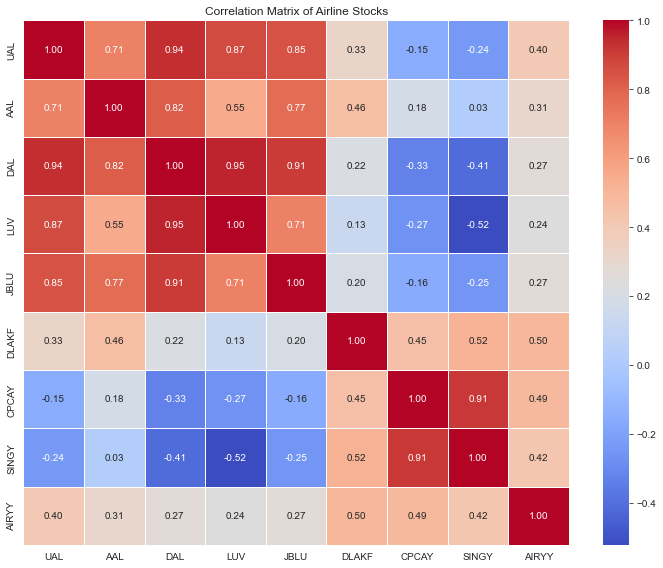

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to 'dark'
sns.set_style("dark")

# List of Airlines symbols
symbols = ["UAL", "AAL", "DAL", "LUV", "JBLU", "DLAKF", "CPCAY", "SINGY", "AIRYY"]

# Fetch the stock data and create a DataFrame
dfs = {}
for symbol in symbols:
    dfs[symbol] = pd.read_csv(f"{symbol}.csv", parse_dates=True, index_col=0)

# Combine the closing prices into a single DataFrame
df_close = pd.concat([df['Close'] for df in dfs.values()], axis=1)
df_close.columns = symbols

# Compute the correlation matrix
airline_matrix = df_close.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(airline_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Airline Stocks")

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig("airline_matrix.png")

# Save the plot to a JPEG file
plt.savefig("airline_matrix.jpeg", format='jpeg')

plt.show()

### Calculate Moving Averages

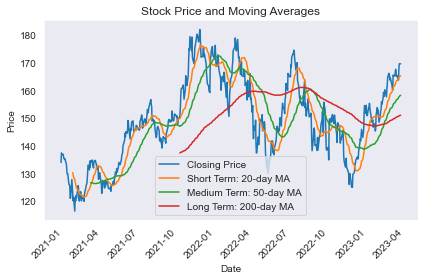

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
datafile = 'AAPL.csv'
df = pd.read_csv(datafile, parse_dates=True, index_col=0)

# Slice the data for the past 52 weeks plus 200 days
past_52_weeks = df.tail(52 * 7 + 200)

## Slice the data for the past 52 weeks
#past_52_weeks = df.tail(52 * 7)

# Calculate the moving averages
ma_20 = past_52_weeks['Close'].rolling(window=20).mean()
ma_50 = past_52_weeks['Close'].rolling(window=50).mean()
ma_200 = past_52_weeks['Close'].rolling(window=200).mean()

# Create a new figure and axis for the plot
fig, ax = plt.subplots()

# Plot the closing price
ax.plot(past_52_weeks.index, past_52_weeks['Close'], label='Closing Price')

# Plot the moving averages
ax.plot(past_52_weeks.index, ma_20, label='Short Term: 20-day MA')
ax.plot(past_52_weeks.index, ma_50, label='Medium Term: 50-day MA')
ax.plot(past_52_weeks.index, ma_200, label='Long Term: 200-day MA')

# Set the plot title and labels
ax.set_title('Stock Price and Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Stock Price Moving Averages - Improved

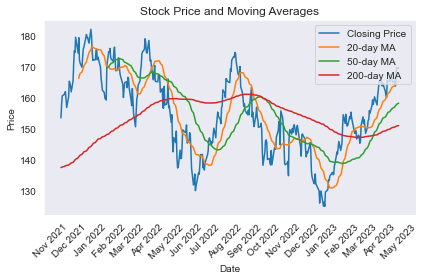

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the data from the CSV file
datafile = 'AAPL.csv'
df = pd.read_csv(datafile, parse_dates=True, index_col=0)

# Slice the data for the past 52 weeks
past_52_weeks = df.tail(52 * 7)

# Calculate the moving averages
ma_20 = past_52_weeks['Close'].rolling(window=20).mean()
ma_50 = past_52_weeks['Close'].rolling(window=50).mean()
ma_200 = df['Close'].rolling(window=200).mean()

# Filter the 200-day moving average for the past 52 weeks
ma_200_52_weeks = ma_200.tail(52 * 7)

# Create a new figure and axis for the plot
fig, ax = plt.subplots()

# Plot the closing price
ax.plot(past_52_weeks.index, past_52_weeks['Close'], label='Closing Price')

# Plot the moving averages
ax.plot(past_52_weeks.index, ma_20, label='20-day MA')
ax.plot(past_52_weeks.index, ma_50, label='50-day MA')
ax.plot(ma_200_52_weeks.index, ma_200_52_weeks, label='200-day MA')

# Set the plot title and labels
ax.set_title('Stock Price and Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Set the x-axis ticker to display ticks at monthly intervals
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Format the x-axis tick labels as month-year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Display a legend
ax.legend()

# Save the plot to a PNG file
plt.tight_layout()
plt.savefig("stock_price_MA.png")

# Save the plot to a JPEG file
plt.savefig("stock_price_MA.jpeg", format='jpeg')

# Show the plot
plt.tight_layout()
plt.show()


### Stock Portfolio Numerical Correlation

In [25]:
import numpy as np
import warnings
import yfinance as yf
import datetime as dt
import pandas as pd

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

num_of_years = 1
start = dt.date.today() - dt.timedelta(days=int(365.25 * num_of_years))
end = dt.date.today()

# Example usage: scrape data for portfolio
tickers = ["^TNX", "AAPL", "BRK-B", "DOW", "IBM", "GE", "MO", "GLD", "SLV"]

dataset = yf.download(tickers, start=start, end=end)['Adj Close']
stocks_returns = np.log(dataset / dataset.shift(1))

print('\nCorrelation Matrix')
corr_matrix = stocks_returns.corr()
print(corr_matrix)

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("\nTop Absolute Correlations")
top_abs_correlations = get_top_abs_correlations(stocks_returns)
print(top_abs_correlations)

# Save correlation matrix and top absolute correlations to Excel file
output_filename = "stock_correlations.xlsx"
with pd.ExcelWriter(output_filename) as writer:
    corr_matrix.to_excel(writer, sheet_name="Correlation Matrix")
    top_abs_correlations.to_excel(writer, sheet_name="Top Absolute Correlations")

print(f"\nData saved to {output_filename}")


[*********************100%***********************]  9 of 9 completed

Correlation Matrix
           AAPL     BRK-B       DOW        GE       GLD       IBM        MO  \
AAPL   1.000000  0.722991  0.493500  0.517551  0.140560  0.500848  0.295805   
BRK-B  0.722991  1.000000  0.710930  0.665937  0.214139  0.576964  0.415343   
DOW    0.493500  0.710930  1.000000  0.652598  0.240190  0.457989  0.404593   
GE     0.517551  0.665937  0.652598  1.000000  0.172107  0.427908  0.355576   
GLD    0.140560  0.214139  0.240190  0.172107  1.000000  0.166614  0.099720   
IBM    0.500848  0.576964  0.457989  0.427908  0.166614  1.000000  0.391507   
MO     0.295805  0.415343  0.404593  0.355576  0.099720  0.391507  1.000000   
SLV    0.226800  0.305948  0.318722  0.217935  0.819451  0.254474  0.183562   
^TNX  -0.049899 -0.054054 -0.029413 -0.001352 -0.519328  0.017736  0.024989   

            SLV      ^TNX  
AAPL   0.226800 -0.049899  
BRK-B  0.305948 -0.054054  
DOW    0.318722 -0.029413  
GE     0

### Single Stock Sentiment Analysis

In [26]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

# Define the search query and URL
query = "AAPL"
url = f"https://www.google.com/search?q={query}&tbm=nws"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the news article headlines and descriptions
headlines = soup.find_all("h3", class_="zBAuLc")
descriptions = soup.find_all("div", class_="BNeawe s3v9rd AP7Wnd")

# Lists to store polarity and subjectivity scores for each article
polarities = []
subjectivities = []

# Extract the text from the headlines and descriptions
articles = []
for headline, description in zip(headlines, descriptions):
    articles.append({
        "headline": headline.get_text(),
        "description": description.get_text()
    })

    # Perform sentiment analysis using TextBlob
    blob = TextBlob(description.get_text())
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Append polarity and subjectivity scores to the lists
    polarities.append(polarity)
    subjectivities.append(subjectivity)

# Calculate the overall sentiment
overall_polarity = sum(polarities) / len(polarities)
overall_subjectivity = sum(subjectivities) / len(subjectivities)

# Print the results for each article
for i, article in enumerate(articles):
    headline = article["headline"]
    description = article["description"]
    polarity = polarities[i]
    subjectivity = subjectivities[i]

    print("Headline:", headline)
    print("Description:", description)
    print("Polarity:", polarity)
    print("Subjectivity:", subjectivity)
    print()

# Print the overall sentiment
print("Overall Polarity:", overall_polarity)
print("Overall Subjectivity:", overall_subjectivity)

Headline: Apple versus the world: The iPhone maker is bigger than almost any stock 
market in the world
Description: CNBC · 7 hours ago
Polarity: 0.0
Subjectivity: 0.0

Headline: Don't Own Apple Stock? You're Probably Regretting It.
Description: Barron's · 4 hours ago
Polarity: 0.0
Subjectivity: 0.0

Headline: 3 Strong-Buy-Rated Big Tech Stocks with ‘Perfect 10’ Smart Scores
Description: TipRanks · 5 hours ago
Polarity: 0.0
Subjectivity: 0.0

Headline: Apple's Pete Distad, Who Oversaw TV+ and Sports Businesses, to Depart
Description: Bloomberg.com · 3 hours ago
Polarity: 0.0
Subjectivity: 0.0

Headline: Apple Just Upped Its Dividend: What You Should Know
Description: The Motley Fool · 1 day ago
Polarity: 0.6
Subjectivity: 0.9

Headline: Apple reports better-than-expected quarter driven by iPhone sales
Description: CNBC · 6 days ago
Polarity: 0.0
Subjectivity: 0.0

Headline: Apple Q2 earnings are down, as everything but iPhones is harder to sell
Description: Ars Technica · 5 days ago
Po